Text(0, 0.5, '$v$')

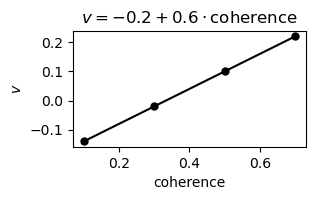

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from drift_diffusion.model import DriftDiffusionModel
from drift_diffusion.sim import sample_from_pdf

n_samples = 10000

coherence = np.array([0.1, 0.3, 0.5, 0.7])
v_s = -0.2 + 0.6 * coherence
X = pd.DataFrame({"coherence": np.repeat(coherence, n_samples // 4)})
y = np.concat([sample_from_pdf(a=1, v=v, n_samples=n_samples // 4, random_state=0) for v in v_s])

fig, ax = plt.subplots(figsize=(3, 1.5))
ax.set_title(r"$v = -0.2 + 0.6 \cdot \text{coherence}$")
ax.plot(coherence, v_s, c="k", marker="o", ms=5)
ax.set_xlabel("coherence")
ax.set_ylabel(r"$v$")

In [2]:
ddm = DriftDiffusionModel(a="+1", t0=0, v="+1 + coherence", z=0)
ddm.fit(X, y)
ddm.params_

array([ 0.99087954, -0.19682031,  0.59703272])